<a href="https://colab.research.google.com/github/itsmesethus/sparkfoundation-gripoct22-/blob/main/GASTROINTESTINAL_MULTICLASS_CLASSIFICATION_USING_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
pip install split-folders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
Data= "/content/drive/MyDrive/1-project.data/kvasir-dataset-v2"

In [5]:
import splitfolders
splitfolders.ratio(Data, output="output", seed=100, ratio=(.80, 0.10,0.10)) 

Copying files: 8000 files [02:29, 53.36 files/s] 


In [6]:
import os
import pathlib  #rootdir is the top most directory in the computer files system
from pathlib import Path
train_data_dir='/content/output/train'
rootdir='/content/output'
print(f"#####  TRAIN_DATASET   #####")
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files inside the " + \
            str(path.name),'class')
            
 
count_files(train_data_dir)

#####  TRAIN_DATASET   #####
There are 800 files inside the dyed-lifted-polyps class
There are 800 files inside the ulcerative-colitis class
There are 800 files inside the normal-cecum class
There are 800 files inside the normal-z-line class
There are 800 files inside the normal-pylorus class
There are 800 files inside the dyed-resection-margins class
There are 800 files inside the esophagitis class
There are 800 files inside the polyps class


In [7]:
import os
import pathlib  #rootdir is the top most directory in the computer files system
from pathlib import Path
val_data_dir='/content/output/val'
rootdir='/content/output'
print(f"#####  VAL_DATASET   #####")
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files inside the " + \
            str(path.name),'class')
            
 
count_files(val_data_dir)

#####  VAL_DATASET   #####
There are 100 files inside the dyed-lifted-polyps class
There are 100 files inside the ulcerative-colitis class
There are 100 files inside the normal-cecum class
There are 100 files inside the normal-z-line class
There are 100 files inside the normal-pylorus class
There are 100 files inside the dyed-resection-margins class
There are 100 files inside the esophagitis class
There are 100 files inside the polyps class


In [8]:
import os
import pathlib  #rootdir is the top most directory in the computer files system
from pathlib import Path
test_data_dir='/content/output/test'
rootdir='/content/output'
print(f"#####  TEST_DATASET   #####")
def count_files(rootdir):
    '''counts the number of files in each subfolder in a directory'''
    for path in pathlib.Path(rootdir).iterdir():
        if path.is_dir():
            print("There are " + str(len([name for name in os.listdir(path) \
            if os.path.isfile(os.path.join(path, name))])) + " files inside the " + \
            str(path.name),'class')
            
 
count_files(test_data_dir)

#####  TEST_DATASET   #####
There are 100 files inside the dyed-lifted-polyps class
There are 100 files inside the ulcerative-colitis class
There are 100 files inside the normal-cecum class
There are 100 files inside the normal-z-line class
There are 100 files inside the normal-pylorus class
There are 100 files inside the dyed-resection-margins class
There are 100 files inside the esophagitis class
There are 100 files inside the polyps class


In [9]:
import tensorflow as tf
from tensorflow.keras import models, layers
from keras.models import Model
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Activation,GlobalAveragePooling2D,ZeroPadding2D
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt


import warnings
warnings.filterwarnings('ignore',category = FutureWarning)

In [10]:

# TRAINING DATASET
path1="/content/output/train"
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=False
       )

train_dataset = train_datagen.flow_from_directory(path1,
                                      target_size = (224,224),
                                      batch_size = 200,
                                      shuffle=True,
                                      class_mode = 'sparse')

# VALIDATION DATASET
path2="/content/output/val"
val_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,      
        vertical_flip=False
       )

# TEST DATASET
path3="/content/output/test"
test_datagen = ImageDataGenerator()
test_dataset = test_datagen.flow_from_directory(path3,
                                      target_size = (224,224),
                                      batch_size = 200,
                                      shuffle=True,
                                      class_mode = 'sparse')




Found 6400 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.


In [11]:
train_dataset.classes.shape

(6400,)

In [12]:
train_dataset.class_indices

{'dyed-lifted-polyps': 0,
 'dyed-resection-margins': 1,
 'esophagitis': 2,
 'normal-cecum': 3,
 'normal-pylorus': 4,
 'normal-z-line': 5,
 'polyps': 6,
 'ulcerative-colitis': 7}

In [13]:
x_train,y_train = next(train_dataset )

x_val,y_val = next(val_dataset)

x_test,y_test = next(test_dataset)

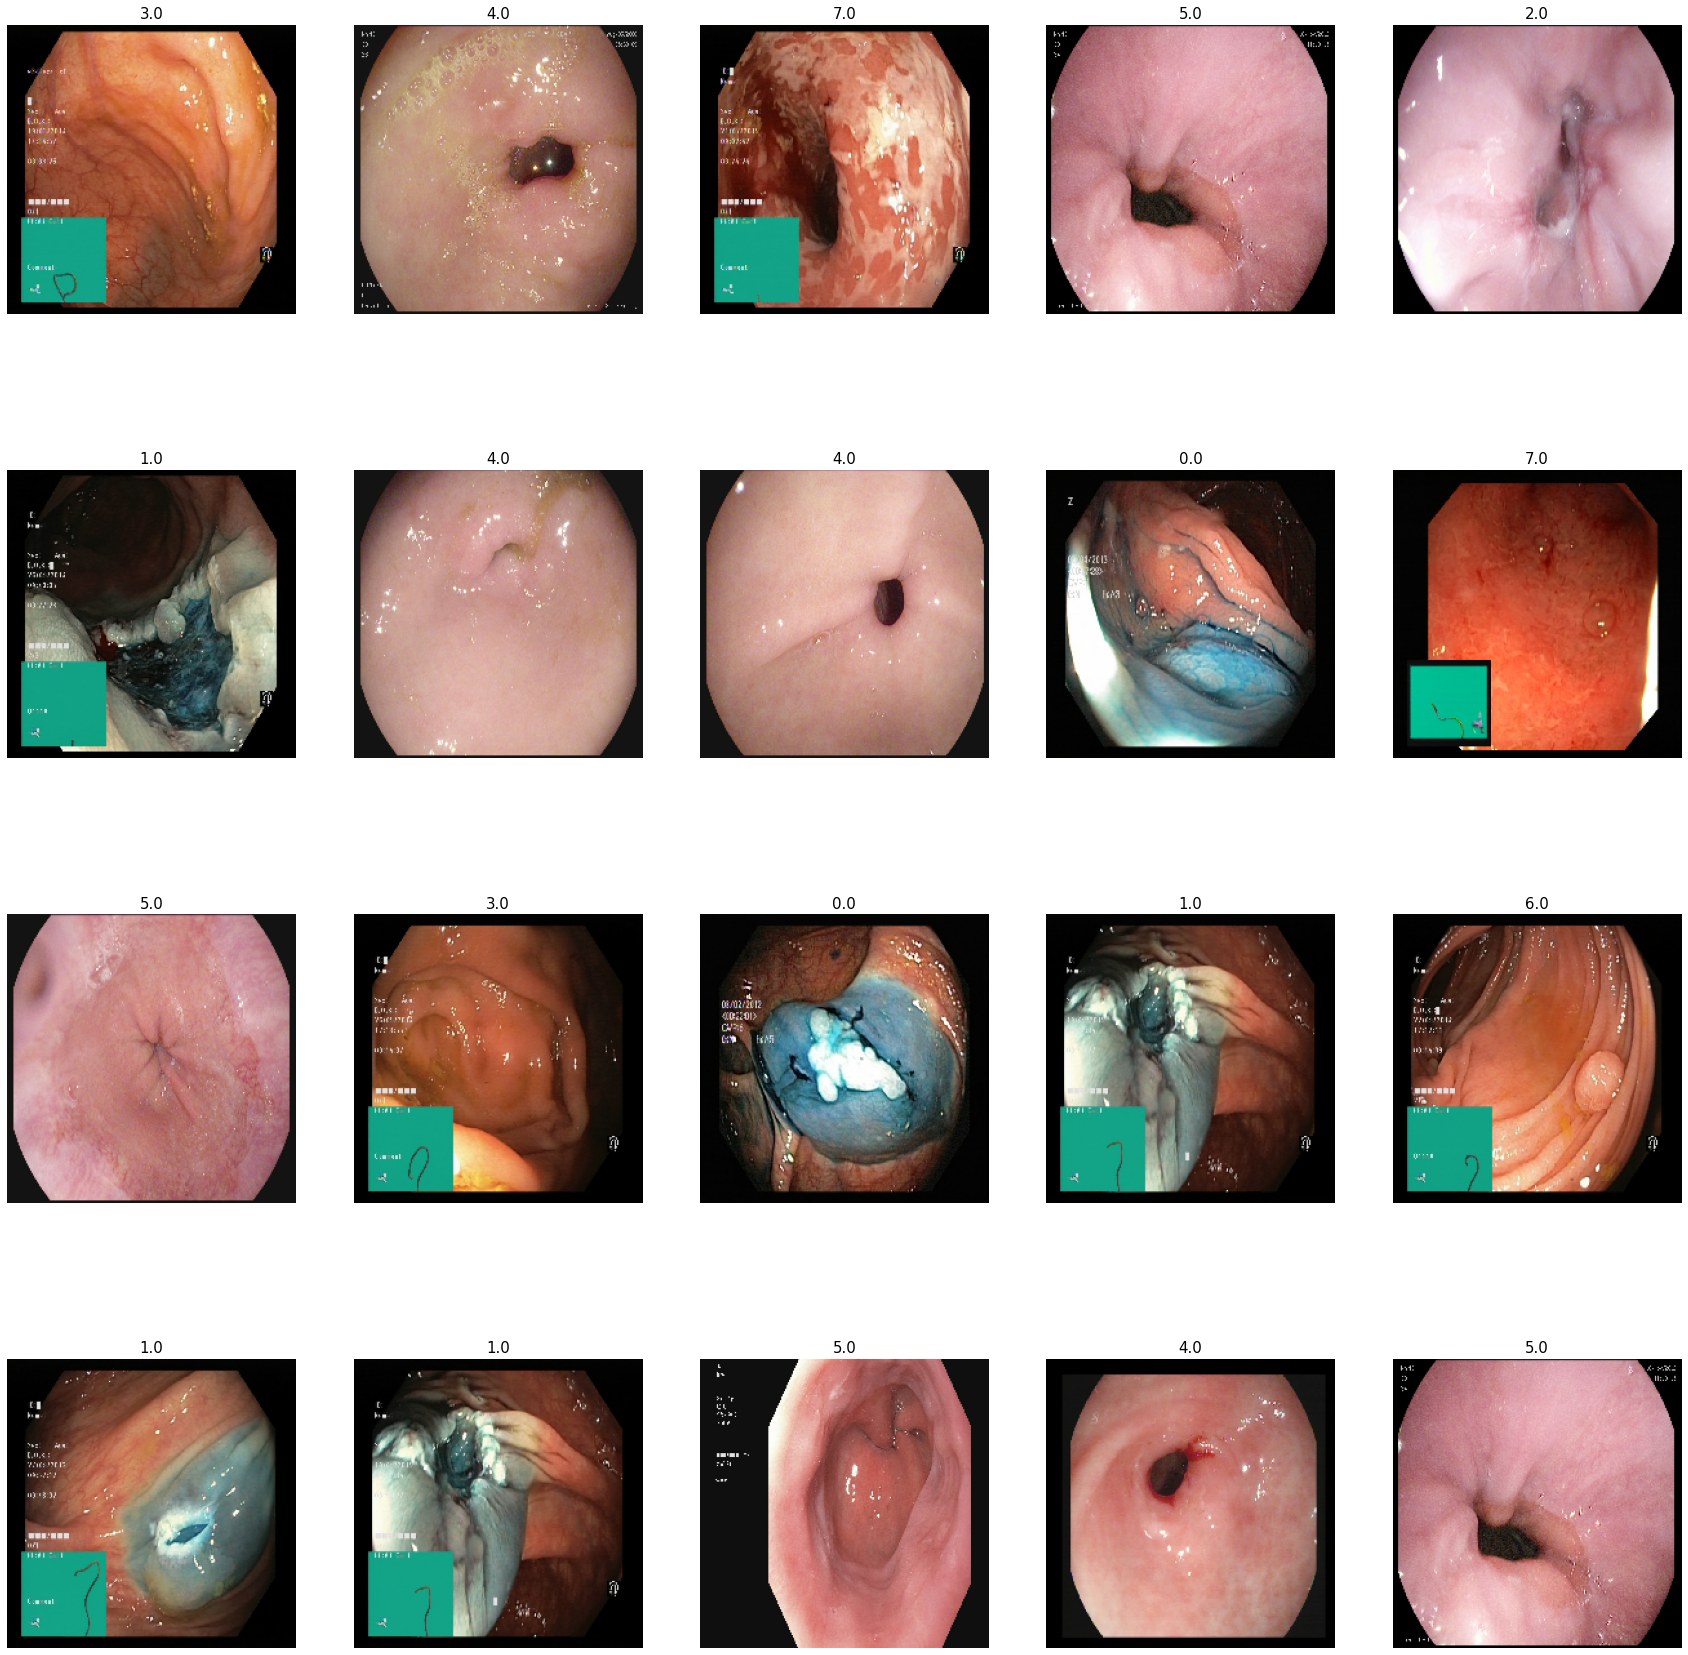

In [44]:
fig,axes=plt.subplots(4,5,figsize=(30,30))

axes=axes.ravel()
n_training=len(x_train)

for i in np.arange(0,20):
  index=np.random.randint(0,n_training)
  axes[i].imshow(x_train[index])
  axes[i].set_title(f'{y_train[index]}',fontsize=15)
  axes[i].axis("off")
plt.subplots_adjust(hspace=0.5)

                                                                          #'dyed-lifted-polyps': 0,
                                                                          #'dyed-resection-margins': 1,
                                                                          #'esophagitis': 2,
                                                                          #'normal-cecum': 3,
                                                                          #'normal-pylorus': 4,
                                                                          #'normal-z-line': 5,
                                                                          #'polyps': 6,
                                                                          #'ulcerative-colitis': 7

In [14]:
print(f"x_train shape is= {x_train.shape},y_train shape is= {y_train.shape}")
print(f"x_val shape is= {x_val.shape},y_val shape is= {y_val.shape}")

x_train shape is= (200, 224, 224, 3),y_train shape is= (200,)
x_val shape is= (200, 224, 224, 3),y_val shape is= (200,)


In [15]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(224,2264),
    layers.experimental.preprocessing.Rescaling(1.0/255)
])

data_agumentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    layers.experimental.preprocessing.RandomRotation(.4),
    layers.experimental.preprocessing.RandomRotation(.8),
    layers.experimental.preprocessing.RandomRotation(.3),
    layers.experimental.preprocessing.RandomRotation(.1),
    layers.experimental.preprocessing.RandomRotation(.5)
])

**VGG16**

In [29]:
from keras.applications.vgg16 import VGG16

In [30]:
vgg=VGG16(input_shape=(224,224,3),include_top=False,weights='imagenet')
n_classes=8

In [32]:
for layer in vgg.layers:
  layer.trainable = False

In [33]:
def lw(bottom_model,n_classes):
  top_model=bottom_model.output
  top_model=GlobalAveragePooling2D()(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(1024,activation='relu')(top_model)
  top_model=Dense(512,activation='relu')(top_model)
  top_model=Dense(n_classes,activation='softmax')(top_model)
  return top_model

In [45]:
fc_head=lw(vgg,n_classes)
Model=Model(inputs=vgg.input,outputs=fc_head)


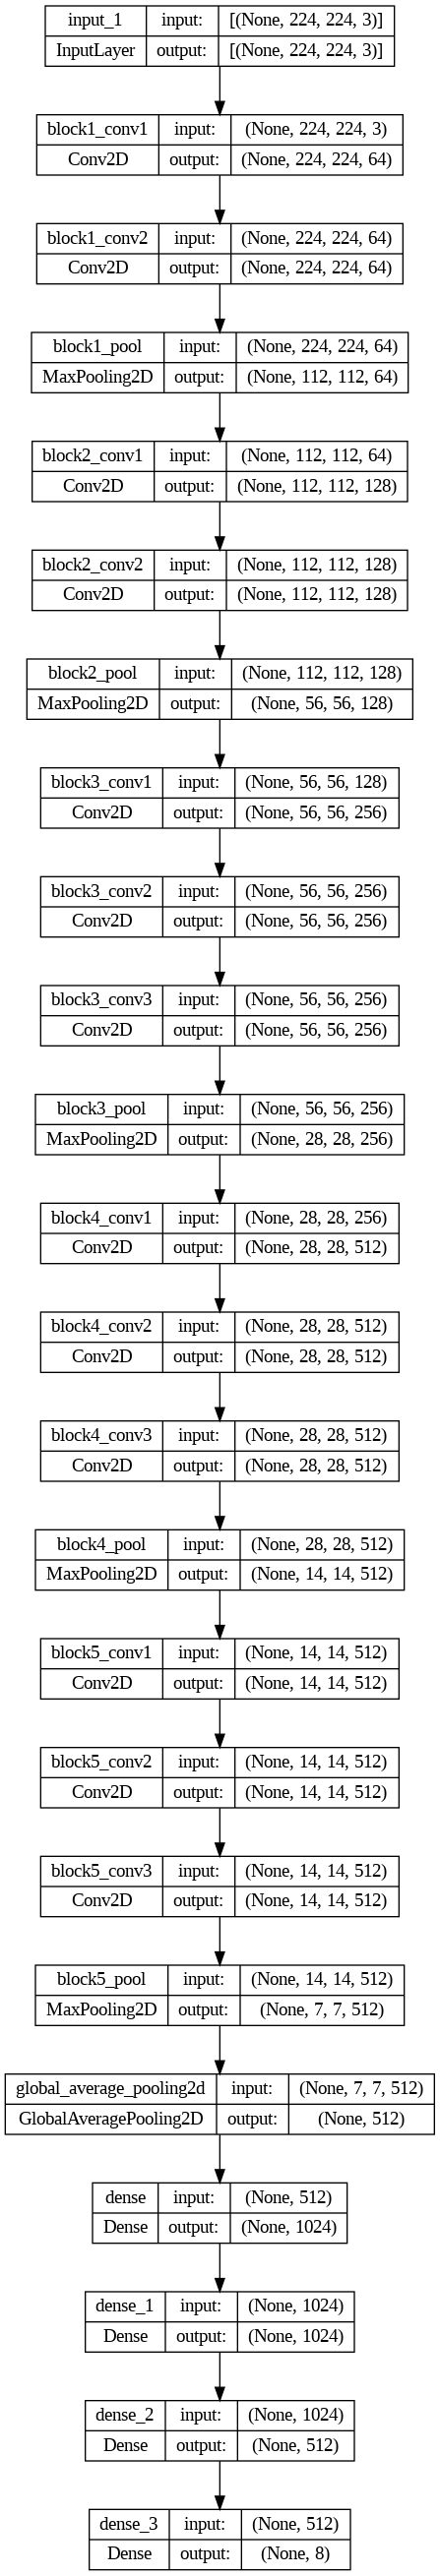

In [46]:
from tensorflow.keras.utils import plot_model
plot_model(Model,show_shapes=True,to_file = 'model.png')

In [21]:
print(Model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [40]:
Model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

In [45]:
history=Model.fit(x_train,y_train,epochs=100,validation_data=(x_val,y_val),verbose=1)

Epoch 1/100
7/7 [==============================] - 2s 321ms/step - loss: 0.0145 - accuracy: 0.9950 - val_loss: 1.4333 - val_accuracy: 0.6900
Epoch 2/100
7/7 [==============================] - 2s 304ms/step - loss: 0.0109 - accuracy: 0.9950 - val_loss: 1.4792 - val_accuracy: 0.6950
Epoch 3/100
7/7 [==============================] - 2s 309ms/step - loss: 0.0085 - accuracy: 1.0000 - val_loss: 1.4412 - val_accuracy: 0.7150
Epoch 4/100
7/7 [==============================] - 2s 307ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 1.5330 - val_accuracy: 0.6950
Epoch 5/100
7/7 [==============================] - 2s 309ms/step - loss: 0.0063 - accuracy: 1.0000 - val_loss: 1.5044 - val_accuracy: 0.7150
Epoch 6/100
7/7 [==============================] - 2s 312ms/step - loss: 0.0088 - accuracy: 1.0000 - val_loss: 1.5819 - val_accuracy: 0.6750
Epoch 7/100
7/7 [==============================] - 2s 312ms/step - loss: 0.0159 - accuracy: 0.9950 - val_loss: 1.5187 - val_accuracy: 0.6900
Epoch 8/100
7

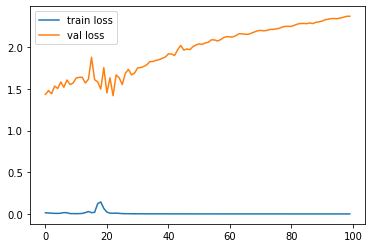

In [47]:
#loss graph
plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()

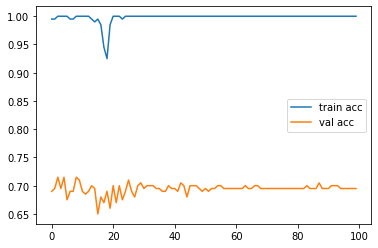

In [48]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
 

plt.savefig('acc-graph.png')
plt.show()

In [49]:
plt.savefig('loss-graph.png')
plt.show()

<Figure size 432x288 with 0 Axes>

In [50]:
#Classification report and confusion matrix for the validation dataset:

y_val_pred=Model.predict(x_val)
y_val_pred=np.argmax(y_val_pred,axis=1)
print(classification_report(y_val_pred,y_val))

7/7 [==============================] - 1s 155ms/step
              precision    recall  f1-score   support

           0       0.79      0.64      0.71        36
           1       0.77      0.77      0.77        22
           2       0.81      0.66      0.72        32
           3       0.82      0.67      0.73        27
           4       0.86      0.83      0.84        23
           5       0.54      0.74      0.62        19
           6       0.59      0.54      0.57        24
           7       0.45      0.82      0.58        17

    accuracy                           0.69       200
   macro avg       0.70      0.71      0.69       200
weighted avg       0.73      0.69      0.70       200



In [51]:
confusion_matrix(y_val_pred,y_val)

array([[23,  5,  0,  0,  0,  0,  3,  5],
       [ 4, 17,  0,  0,  0,  0,  0,  1],
       [ 0,  0, 21,  0,  2,  9,  0,  0],
       [ 0,  0,  0, 18,  0,  0,  5,  4],
       [ 0,  0,  1,  0, 19,  3,  0,  0],
       [ 0,  0,  4,  0,  1, 14,  0,  0],
       [ 1,  0,  0,  3,  0,  0, 13,  7],
       [ 1,  0,  0,  1,  0,  0,  1, 14]])

In [52]:
y_pred=Model.predict(x_test)
y_pred=np.argmax(y_pred,axis=1)
print(classification_report(y_pred,y_test))
confusion_matrix(y_pred,y_test)

7/7 [==============================] - 1s 159ms/step
              precision    recall  f1-score   support

         0.0       0.16      0.60      0.25         5
         1.0       0.88      0.48      0.62        48
         2.0       0.00      0.00      0.00         0
         3.0       0.15      0.57      0.24         7
         4.0       0.56      0.93      0.70        15
         5.0       0.30      0.50      0.37        16
         6.0       0.39      0.58      0.47        19
         7.0       0.96      0.24      0.39        90

    accuracy                           0.42       200
   macro avg       0.42      0.49      0.38       200
weighted avg       0.75      0.42      0.47       200



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


array([[ 3,  2,  0,  0,  0,  0,  0,  0],
       [11, 23,  8,  1,  0,  2,  2,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  0,  0,  4,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 14,  1,  0,  0],
       [ 0,  0,  8,  0,  0,  8,  0,  0],
       [ 0,  0,  0,  7,  0,  1, 11,  0],
       [ 3,  1,  9, 15, 11, 15, 14, 22]])

In [53]:
Model.save('/content/drive/MyDrive/gastro_Project/model-recent.h5')